# Naive (Persistence) Model
* The Forecast of Previous Time Period is the Forecast of Current Time period

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [47]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [48]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df['t'] = df.Temp.shift(1)

In [5]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [6]:
df.shape

(3650, 3)

In [49]:
# We will take Last 7 data as Test Data and the rest as Train data
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:] #Ignore the First row

In [9]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [10]:
test.head(10)

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [11]:
train_x, train_y = train.t, train.Temp
test_x, test_y = test.t, test.Temp

## Walk-Forward Validation

In [12]:
prediction = test_x.copy()

In [14]:
print(prediction, test_y)


3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64 3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


### Lets see the Errors in our Model

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, prediction)
mse

3.4228571428571413

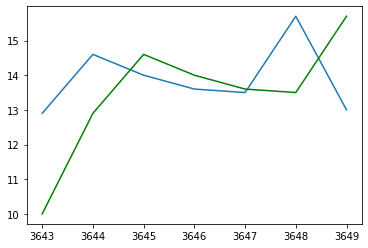

In [20]:
plt.plot(test_y)
plt.plot(prediction, color = 'green')

In [21]:
# The mse value is very Important to Compare Naive (Persistence) model with Other Advanced Models.

# Auto Regression Model

In [23]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [25]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [26]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [27]:
from statsmodels.tsa.ar_model import AR

In [28]:
model = AR(train)

In [29]:
model_fit = model.fit()

#### No. of Lag Variables

In [31]:
model_fit.k_ar

29

### Coefficient of Lag Variables

In [33]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [35]:
predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1)

In [36]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [37]:
predictions.iloc[0]

11.871274847727832

In [38]:
predictions.iloc[1]

13.053794217229814

### Lets Find the MSE value

In [39]:
mse1 = mean_squared_error(test_y, predictions)

In [40]:
mse1

1.501525231006988

#### So if we Compare the MSE1 value with MSE of Naive model, the AR model has Less Mean Squared Error value. SO we can say that the Data is not a Random Walk data and has some Potential Meaning to it.

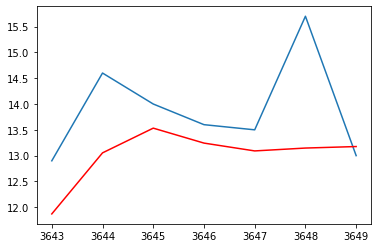

In [43]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')

## Walk Forward Validation for AR model

In [51]:
# We will use the Test and Train set
import numpy as np

In [69]:
df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [73]:
train1, test1 = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]


In [75]:
# we will run a For Loop
data1 = train1
predicts=[]
for t in test1:
    model = AR(data1)
    model_fit = model.fit()
    y=model_fit.predict(start=len(data1), end=len(train1)+len(test1)-1)
    print(y.values[0])
    predicts.append(y.values[0])
    data1 = np.append(data1, t)
    data1 = pd.Series(data1)

11.871274847727832
13.660699943835198
14.353164144090158
13.43012079162701
13.374756477185123
13.47911129942051
14.767773018439883


In [76]:
predicts

[11.871274847727832,
 13.660699943835198,
 14.353164144090158,
 13.43012079162701,
 13.374756477185123,
 13.47911129942051,
 14.767773018439883]

In [77]:
mse2 = mean_squared_error(test1.values,predicts)
mse2

1.452456842518536

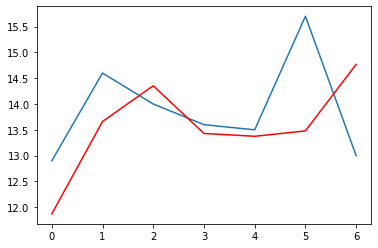

In [79]:
plt.plot(test1.values)
plt.plot(predicts, color = 'red')